# Import

## Library import

In [1]:
import pandas as pd
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
import glob
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

# Analysis

## Hector

### Policies
Importing, merging, and creating a column containing the state of policies.

In [2]:
policies_path = ".\\CCI_C-19_Policies\\data_tables\\policy_data\\table_data\\Current\\"
policies_files = glob.glob(policies_path + "*.csv")

content = [] #store contents from files

for filepath in policies_files:
    
    df = pd.read_csv(filepath, index_col=None)
    #Stripping the string to store the name of the file to a State column
    #State column should be the second column
    df.insert(1,"State", filepath.replace(policies_path,"").replace("_policy.csv",""))
    content.append(df)


policies_df = pd.concat(content)

In [3]:
policies_df

,date,State,policy,Restrict/Close,Opening (State),Deferring to County,Testing,Education,Health/Medical,Emergency Level,Transportation,Budget,Social Distancing,Other,Vaccine,Opening (County)
0,6-Mar-20,Alabama,Governor Ivey announced the formation of a Cor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,10-Mar-20,Alabama,Governor Ivey sent a memo to state agency head...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,13-Mar-20,Alabama,Governor Ivey issued a state of emergency for ...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN,NaN
3,14-Mar-20,Alabama,Governor Ivey closed all Alabama public school...,Y,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15-Mar-20,Alabama,Governor Ivey authorized directors of all stat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,29-Apr-21,Wyoming,Wyoming’s two remaining COVID-19 statewide pub...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN
75,13-May-21,Wyoming,Governor Gordon Withdraws Wyoming from COVID-e...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN
76,21-May-21,Wyoming,The Wyoming Department of Health (WDH) is anno...,NaN,Y,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
77,4-Aug-21,Wyoming,"Governor Will Not Issue Mask Mandate, Stresses...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [4]:
# Getting all unique values from the columns after "policy" columns in the dataframe
for col in policies_df.columns[3:]:
    print(col,": ",set(policies_df[col]))

Restrict/Close :  {nan, ' ', 'y', 'Y'}
Opening (State) :  {nan, 'y', 'Y'}
Deferring to County :  {nan, 'Y'}
Testing :  {nan, 'Y'}
Education :  {nan, 'Y'}
Health/Medical :  {nan, 'y', 'Y'}
Emergency Level :  {nan, 'y', 'Y'}
Transportation :  {nan, 'Y'}
Budget :  {nan, 'y', 'Y'}
Social Distancing :  {nan, 'y', 'Y'}
Other :  {nan, 'y', 'Y'}
Vaccine :  {nan, 'y', 'Y'}
Opening (County) :  {nan, 'Y'}


In [5]:
# Fixin some of the inconsistencies such as lower case Y seen in
# previous cell.

# Replacing only single lowercase y to Y
policies_df.replace(to_replace=r'^y$',value="Y",regex=True,inplace=True)

In [6]:
# Finding which entry has a whitespace
policies_df[policies_df['Restrict/Close'].str.contains("\s", regex=True, na=False)]

,date,State,policy,Restrict/Close,Opening (State),Deferring to County,Testing,Education,Health/Medical,Emergency Level,Transportation,Budget,Social Distancing,Other,Vaccine,Opening (County)
25,11-Apr-20,Kansas,The Kansas Supreme Court upheld the Governor'...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [7]:
# Reading the policy from entry
list(policies_df["policy"][policies_df['Restrict/Close'].str.contains("\s", regex=True, na=False)])

[" The Kansas Supreme Court upheld the Governor's executive order limiting the size of mass gathering to 10 people, including that of church services and funerals. "]

Policy doesnt provide enough info so will just fill with NaN in the meantime.

In [8]:
policies_df['Restrict/Close'].replace("\s", np.nan ,inplace=True,regex=True)

In [9]:
# Re-verifying all unique values
for col in policies_df.columns[3:]:
    print(col,": ",set(policies_df[col]))

Restrict/Close :  {nan, 'Y'}
Opening (State) :  {nan, 'Y'}
Deferring to County :  {nan, 'Y'}
Testing :  {nan, 'Y'}
Education :  {nan, 'Y'}
Health/Medical :  {nan, 'Y'}
Emergency Level :  {nan, 'Y'}
Transportation :  {nan, 'Y'}
Budget :  {nan, 'Y'}
Social Distancing :  {nan, 'Y'}
Other :  {nan, 'Y'}
Vaccine :  {nan, 'Y'}
Opening (County) :  {nan, 'Y'}


In [10]:
# Dropping, if any, duplicates that are contained from the first 3 cols
policies_df.drop_duplicates(["date","State","policy"], inplace=True)

In [11]:
# Checking dups of only first 2 cols
policies_df[policies_df.duplicated(["date","State"], keep= False)]

,date,State,policy,Restrict/Close,Opening (State),Deferring to County,Testing,Education,Health/Medical,Emergency Level,Transportation,Budget,Social Distancing,Other,Vaccine,Opening (County)
4,15-Mar-20,Alabama,Governor Ivey authorized directors of all stat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
5,15-Mar-20,Alabama,The Governor authorized directors of all state...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN
7,17-Mar-20,Alabama,The Governor emphasized measures taken by fina...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
8,17-Mar-20,Alabama,The Alabama Department of Public Health issued...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,20-Mar-20,Alabama,The Governor issued an updated statewide publi...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,1-Jul-20,Wyoming,The Wyoming Superintendent announced the relea...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
54,19-Nov-20,Wyoming,Governor Mark Gordon has authorized additional...,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,19-Nov-20,Wyoming,Governor Mark Gordon announced additional stat...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,11-Dec-20,Wyoming,Governor Mark Gordon announced the opening of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [12]:
list(policies_df.columns[2:])

['policy',
 'Restrict/Close',
 'Opening (State)',
 'Deferring to County',
 'Testing',
 'Education',
 'Health/Medical',
 'Emergency Level',
 'Transportation',
 'Budget',
 'Social Distancing',
 'Other',
 'Vaccine',
 'Opening (County)']

There seem to be multiple entries per date,state. Maybe merging them could be a good idea.

In [13]:
policies_df.dtypes

date                   object
State                  object
policy                 object
Restrict/Close         object
Opening (State)        object
Deferring to County    object
Testing                object
Education              object
Health/Medical         object
Emergency Level        object
Transportation         object
Budget                 object
Social Distancing      object
Other                  object
Vaccine                object
Opening (County)       object
dtype: object

In [14]:
# Combining data between the date and state columns
# Inspired by
# https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns

cols = list(policies_df.columns[2:])
dic = {}

for col in cols:
    # Changin datatype to string to avoid issues with nans
    policies_df = policies_df.astype({col: str})
    # Property of joining with commas for the agg
    dic[col] = ",".join

policies_df = policies_df.groupby(["date","State"]).agg(dic).reset_index()


In [15]:
policies_df

,date,State,policy,Restrict/Close,Opening (State),Deferring to County,Testing,Education,Health/Medical,Emergency Level,Transportation,Budget,Social Distancing,Other,Vaccine,Opening (County)
0,1-Apr-20,American Samoa,The Governor issued the second amended declara...,Y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1-Apr-20,Arizona,The Governor announced the contribution of $25...,"nan,nan,nan,nan","nan,nan,nan,nan","nan,nan,nan,nan","nan,nan,nan,nan","nan,nan,nan,nan","nan,nan,Y,nan","nan,nan,nan,nan","nan,nan,nan,nan","nan,nan,nan,nan","nan,nan,nan,nan","Y,Y,Y,Y","nan,nan,nan,nan","nan,nan,nan,nan"
2,1-Apr-20,Arkansas,The Governor implemented day use operations on...,"nan,nan","nan,nan","nan,nan","nan,Y","nan,nan","nan,nan","nan,nan","nan,nan","nan,nan","nan,nan","Y,Y","nan,nan","nan,nan"
3,1-Apr-20,California,The Governor issued an executive order that al...,"nan,nan","nan,nan","nan,nan","nan,nan","nan,Y","nan,nan","nan,nan","nan,nan","nan,nan","nan,nan","Y,nan","nan,nan","nan,nan"
4,1-Apr-20,Colorado,The Governor announced that he would extend th...,"Y,nan","nan,nan","nan,nan","nan,nan","nan,nan","nan,Y","nan,nan","nan,nan","nan,nan","nan,nan","nan,nan","nan,nan","nan,nan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,9-Sep-20,New Hampshire,Governor Chris Sununu issued Emergency Order #...,nan,nan,nan,nan,nan,nan,Y,nan,nan,nan,Y,nan,nan
5084,9-Sep-20,New York,Governor Cuomo announced indoor dining in New ...,nan,Y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5085,9-Sep-20,Oklahoma,The Oklahoma State Department of Health (OSDH)...,nan,Y,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
5086,9-Sep-20,South Dakota,Governor Kristi Noem laid out a framework for ...,nan,nan,nan,nan,nan,nan,nan,nan,Y,nan,Y,nan,nan


In [16]:
#Iterating through dataframe to
#Fix 

# for index, row in policies_df.iterrows():
    
# #     for col in list(policies_df.columns)[3:]:#only the 4th column onwards
        
# #         for val in row[col]:
# #             splt = val.split(',') #split on comma
# #             print(val)
#     for val in row:
#         print(val)
#     #         if len(splt) > 1: #only if split contains more than 1 value
#     #             if 'Y' in splt: #Filtering only ones containing Y
#     #                 policies_df[index]

#     #             else: #
                

# for index, row in policies_df.iterrows():
#     print(row["date"])

def reducto(df):
    dic = {}
    
    cols = list(df.columns)[3:] #Only the columns 4th and forward
    
    for col in cols:
        for val in df[col]:
            split = val.split(',')
            if len(split) > 1:
                if "Y" in split:
                    dic[col] = "Y"
                else:
                    dic[col] = np.nan
    return pd.Series(dic, index=cols, dtype = object)

policies_df = policies_df.groupby(["date","State","policy"]).apply(reducto).reset_index()  

In [17]:
# Counting most common words, inspired by
# https://www.houseninetytwo.com/how-to-use-python-to-extract-keywords-from-sentance-in-dataframe/
common_words = pd.Series(' '.join(policies_df['policy']).split()).value_counts()[:40]
common_words

to            8915
the           8892
and           7784
of            6481
Governor      5148
The           4067
for           3993
in            3051
announced     2780
a             2679
that          2102
COVID-19      1752
will          1581
with          1352
an            1340
on            1321
Department    1258
state         1142
Health        1124
order         1056
health        1048
issued        1030
be             885
as             860
at             837
public         803
by             768
or             747
from           742
signed         731
care           719
executive      719
Order          713
is             710
all            696
are            643
new            623
Executive      620
State          610
million        559
dtype: int64

In [18]:
uncommon_words = pd.Series(' '.join(policies_df['policy']).split()).value_counts()[-40:]
uncommon_words

Scarborough           1
H.                    1
Pfzer                 1
frst                  1
dose).                1
29th                  1
Modification,         1
Hit                   1
Hardest               1
Plus,                 1
$25M                  1
“Bridge               1
Fund”                 1
Medicare-certified    1
relatives             1
deaths.               1
can,                  1
schools,Regional      1
Northeastern          1
(i.e.                 1
fnal                  1
weeks)                1
charting              1
3411,                 1
uninterrupted         1
governs               1
designations.The      1
Memphis               1
401                   1
2018                  1
Stakeholders          1
(2                    1
K-12,                 1
officials.,The        1
zoos.                 1
210,000               1
Taiwanese             1
Corporations          1
Were                  1
Dakota’s              1
dtype: int64

In [19]:
# Convert all to lowercase for case sensitivity, as stopwords are lowercase
policies_df['policy'] = policies_df['policy'].str.lower()

In [20]:
# Remove duplicate words within the same row, or cell.
def rem_dup(x):
    x = x.replace(",","").replace(".","")#removing commas and periods
    
    words = x.split(' ') #splitting words by space
    
    new_words = set(words) #This will only keep unique words
    
    new_words_str = " ".join(new_words) #Turning the list back to a string
    
    return new_words_str
    
policies_df['policy'] = policies_df['policy'].apply(rem_dup)

In [21]:
#list of stop words (i can add more words if necesary
stop_words = set(stopwords.words('english'))
# stop_words = stop_words.union([""]) #To add custom/extra words
#stop_words

In [22]:
# Remove useless words using the stop words
policies_df['policy'] = policies_df['policy'].apply(lambda x: ' '.join(item for item in x.split() if item not in stop_words))
#policies_df.head(50)

In [23]:
# Adding a word count column
policies_df.insert(3, "word_count", policies_df['policy'].apply(lambda x: len(str(x).split(" "))))
policies_df

,date,State,policy,word_count,Restrict/Close,Opening (State),Deferring to County,Testing,Education,Health/Medical,Emergency Level,Transportation,Budget,Social Distancing,Other,Vaccine,Opening (County)
0,1-Apr-20,American Samoa,governor issued second amended declaration con...,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1-Apr-20,Arizona,"governor announced contribution $250,000 arizo...",61,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,1-Apr-20,Arkansas,"governor implemented day use operations only, ...",32,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,1-Apr-20,California,governor issued executive order allows immedia...,32,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,1-Apr-20,Colorado,governor announced would extend suspension nor...,23,Y,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,9-Sep-20,New Hampshire,governor chris sununu issued emergency order #...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5084,9-Sep-20,New York,governor cuomo announced indoor dining new yor...,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5085,9-Sep-20,Oklahoma,oklahoma state department health (osdh) releas...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5086,9-Sep-20,South Dakota,governor kristi noem laid framework $400 milli...,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Statistics of word count
policies_df.word_count.describe()

count    5088.000000
mean       29.514347
std        23.798615
min         3.000000
25%        14.000000
50%        22.000000
75%        37.000000
max       208.000000
Name: word_count, dtype: float64

In [25]:
#refreshing most common words now that we removed stop words
common_words = pd.Series(' '.join(policies_df['policy']).split()).value_counts()[:40]
common_words

governor      5170
announced     2780
health        2172
order         1769
covid-19      1762
state         1752
executive     1339
department    1271
public        1188
new           1176
issued        1032
emergency      979
care           859
signed         732
services       731
million        627
testing        585
provide        519
businesses     494
may            467
additional     448
guidance       441
states         429
support        424
school         401
federal        382
program        373
vaccine        371
phase          355
certain        345
social         334
local          332
relief         330
help           326
medical        306
small          302
facilities     300
schools        300
plan           299
economic       295
dtype: int64

<BarContainer object of 40 artists>

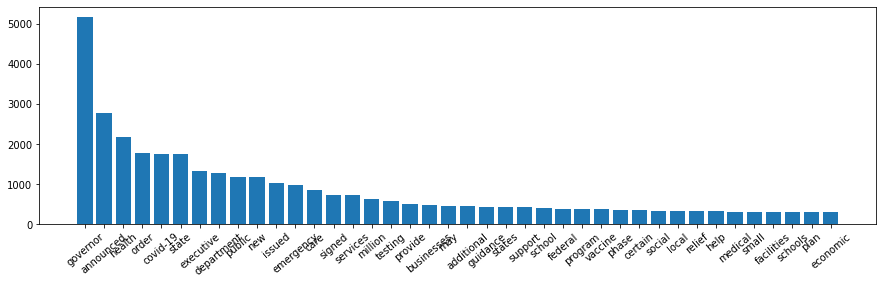

In [26]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=40)
plt.bar(common_words.index, common_words)

In [27]:
#Refreshing least common words
uncommon_words = pd.Series(' '.join(policies_df['policy']).split()).value_counts()[-1000:]
uncommon_words = uncommon_words[uncommon_words > 2] # Removing all words which only have 1 count
uncommon_words

Series([], dtype: int64)

In [28]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=40)
plt.bar(uncommon_words.index[40:, uncommon_words[40:])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (Temp/ipykernel_5052/1577507526.py, line 3)

#### Policies Dictionary

No column dictionary was provided in the repository for these. Will make my own.

**The following are the primary cols**

date: date it occured

State: string of State

policy: string of actions taken by the state

**The rest are just booleans, of which are mostly either Y or nan**

Restrict/Close: Closure of unesential businesses?

Opening (State): Opened the state to foreigners?

Deferring to County: ?

Testing: Covid testing began?

Education: Physical attendance of education again?

Health/Medical: ?

Emergency Level: ?

Transportation: Public transportation??
       
Budget: ?
       
Social Distancing: Social distancing was active?

Other: ?
       
Vaccine: Vaccines were active?

Opening (County): ?

#### Will attempt keyword extraction from the dataset